<p>Here, we want to make a 2x2 set of images with a common colorbar. Python doesn't do this extremely well, but it is OK. The FourFig function will do this. The required inputs are the four images we want to plot. For now, the figure size is hard coded in because it doesn't really matter too much.</p>
<p>Note: This code only works in a particular directory, and is not intended for general use. The only concerns, however, are the (relative) paths of the input files -- the gamma-ray counts map and the four templates. And that is not terribly difficult to fix. I do not think it is worth creating a whole class or module to deal with this.</p>

In [1]:
import pyfits
import aplpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
plt.rcParams.update({'font.size':20})
from scipy import ndimage

In [2]:
tau = pyfits.open('ro_tau_av_flip.fits')
nicer = pyfits.open('NICER_flip_gt0.fits')
dobdss = pyfits.open('DobDSS_flip_gt0.fits')
dob2mass = pyfits.open('Dob2MASS_flip_gt0.fits')
cm = pyfits.open('../CleanData/CMAP_ISM.fits')


In [87]:
def FourFig(f1, f2, f3, f4, plot=True, save=False, fname='IMG.png', dpi=60, vmin=0, vmax=20, 
            xlabel='', ylabel='', extent=None, title1=r'$\tau_{353}$', title2='NICER',
            title3='Dobashi DSS', title4='Dobashi 2MASS', aspect=1, cmap=plt.cm.jet, xticks=None, 
            yticks=None):
    """ f1 - f4 are the four images we want to plot in the following order:
        f1 f2
        f3 f4
        
        plot=True/False to display final image
        save=True/False to save. If True, then fname='filename' that the image saves under
        dpi=60 Dots Per Inch: printing resolution. Used for PDF and EPS file formats here.
        xlabel, ylabel='something' X- or Y- axis labels
        extent=[a,b,c,d], where a,b,c,d are numbers representing the min_x, max_x, min_y,
                          max_y respectively of the image axes.
        title#='blah' Label of each image. Set each title to the empty string for no titles
                      Label placed inside figure, as per Astrophysical Journal requirements
        aspect=number The aspect ratio between x- and y- axes
        cmap= colormap. Use matplotlib predefined with plt.cm.___ or your own color map
        xticks=[1,2,3] array defining xtick locations
    """
    # Set defaults, if not specified
    if ( extent == None ):
        extent = [0,f1.shape[0],0,f1.shape[1]]
        
    if ( xticks == None ):
        xticks = np.linspace(extent[0],extent[1],5)
        
    if ( yticks == None ):
        yticks = np.linspace(extent[2],extent[3],5)
    
    fig1 = plt.figure(figsize=(8,7))
    
    # First figure: subplot then show image inside given axes with labels, ticks, etc. 
    # Repeat for all four images.
    ax1 = fig1.add_subplot(221)
    ax1.imshow(f1, origin='lower', vmin=vmin, vmax=vmax, extent=extent, cmap=cmap, aspect=aspect)
#    ax1.set_title(title1)
    ax1.annotate(title1,xy=(0.38,0.57),xytext=(0.38,0.57),textcoords='figure fraction')
    ax1.set_xticklabels([])
    ax1.set_yticks(yticks)
    ax1.set_ylabel(ylabel)

    ax2 = fig1.add_subplot(222)
    ax2.imshow(f2, origin='lower', vmin=vmin, vmax=vmax, extent=extent, cmap=cmap, aspect=aspect)
#    ax2.set_title(title2)
    ax2.annotate(title2,xy=(0.77,0.57),xytext=(0.77,0.57),textcoords='figure fraction')
    ax2.set_xticklabels([])
    ax2.set_yticks(yticks)
    ax2.set_yticklabels([])

    ax3 = fig1.add_subplot(223)
    ax3.imshow(f3, origin='lower', vmin=vmin, vmax=vmax, extent=extent, cmap=cmap, aspect=aspect)
#    ax3.set_title(title3)
    ax3.annotate(title3,xy=(0.24,0.13),xytext=(0.24,0.13),textcoords='figure fraction')
    ax3.set_xlabel(xlabel)
    ax3.set_ylabel(ylabel)
    ax3.set_yticks(yticks)

    ax4 = fig1.add_subplot(224)
    im = ax4.imshow(f4, origin='lower', vmin=vmin, vmax=vmax, extent=extent, cmap=cmap, aspect=aspect)
#    ax4.set_title(title4)
    ax4.annotate(title4,xy=(0.61,0.13),xytext=(0.61,0.13),textcoords='figure fraction')
    ax4.set_yticklabels([])
    ax4.set_xlabel(xlabel)
    ax4.set_yticks(yticks)

    # Add colorbar. Make tick labels integers, since this is just a qualitative map anyway
    fig1.subplots_adjust(right=0.890)
    cbar_ax = fig1.add_axes([0.9, 0.12, 0.025, 0.36])
    fig1.colorbar(im, cax=cbar_ax,ticks=np.linspace(vmin,vmax,5).astype(int))
    
    # Display and save, if options given
    if ( plot == True ):
        fig1.show()
        
    if ( (save == True) and (len(fname > 0)) ):
        if ( '.png' in fname ):
            fig1.savefig(fname)
        elif ( (('.eps' in fname) or ('.pdf' in fname)) and (dpi>0) ):
            fig1.savefig(fname,dpi=dpi)
        
    return fig1

def Temp(cm,tem,xbin,ybin,tem_name='nicer'):
    A = tem[0].data[65:165,80:180]
    B = cm[0].data[56:156,56:156]
    H,_,_ = np.histogram2d(A[A>0],B[A>0],bins=[xbin,ybin])
    return H

C:\Users\Ryan\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


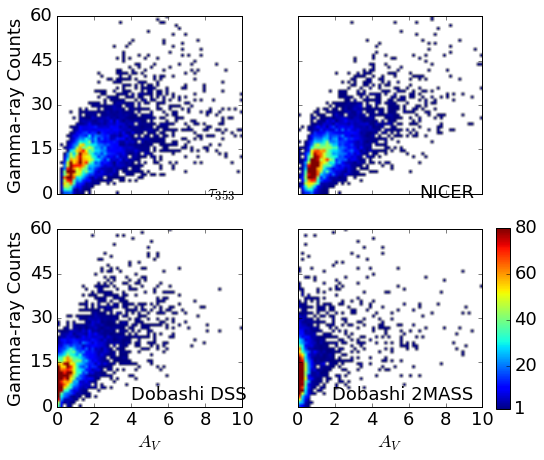

In [88]:
xbin = np.linspace(0,10,61)
ybin = np.linspace(0,60,61)
plt.rcParams.update({'font.size':18})
# Create the density map for each Av tracer, in order to plot

tau = pyfits.open('ro_tau_av_flip.fits')
#tau[0].data = ndimage.gaussian_filter(tau[0].data,sigma=1)
H1 = Temp(cm,tau,xbin,ybin)
H1[H1==0] = np.nan

#tau = pyfits.open('ro_tau_av_flip.fits')
#tau[0].data = ndimage.gaussian_filter(tau[0].data,sigma=3)
H2 = Temp(cm,nicer,xbin,ybin)
H2[H2==0] = np.nan

tau = pyfits.open('ro_tau_av_flip.fits')
#tau[0].data = ndimage.gaussian_filter(tau[0].data,sigma=5)
H3 = Temp(cm,dobdss,xbin,ybin)
H3[H3==0] = np.nan

tau = pyfits.open('ro_tau_av_flip.fits')
#tau[0].data = ndimage.gaussian_filter(tau[0].data,sigma=7)
H4 = Temp(cm,dob2mass,xbin,ybin)
H4[H4==0] = np.nan
H1 = np.transpose(H1)
H2 = np.transpose(H2)
H3 = np.transpose(H3)
H4 = np.transpose(H4)

fig2 = FourFig(H1, H2, H3, H4, plot=True, xlabel=r'$A_V$', ylabel='Gamma-ray Counts',vmin=1, vmax=80, 
               cmap=plt.cm.jet,  title1=r'$\tau_{353}$', title2=r'NICER', title3=r'Dobashi DSS', 
               title4=r'Dobashi 2MASS', xticks=[0,2,4,6,8,10], extent=[0,10,0,60],aspect=0.16)

In [90]:
fig2.savefig('GammaTemplate_compare_max10.eps',dpi=60)

<p>Note: The labels are offset somewhat. When I save the figures as .eps or .pdf, things seems to shift a little bit. In other words, what is displayed inline here is NOT exactly what is saved in a file. I don't know a better way to deal with it than just playing around with the placements by hand.</p>